# 1036. Escape a Large Maze
In a 1 million by 1 million grid, the coordinates of each grid square are (x, y) with 0 <= x, y < 10^6.

We start at the source square and want to reach the target square.  Each move, we can walk to a 4-directionally adjacent square in the grid that isn't in the given list of blocked squares.

Return true if and only if it is possible to reach the target square through a sequence of moves.

Example 1:

Input: blocked = [[0,1],[1,0]], source = [0,0], target = [0,2]

Output: false

Explanation: 
The target square is inaccessible starting from the source square, because we can't walk outside the grid.
Example 2:

Input: blocked = [], source = [0,0], target = [999999,999999]

Output: true

Explanation: 
Because there are no blocked cells, it's possible to reach the target square.
 

Note:

* 0 <= blocked.length <= 200
* blocked[i].length == 2
* 0 <= blocked[i][j] < 10^6
* source.length == target.length == 2
* 0 <= source[i][j], target[i][j] < 10^6
* source != target

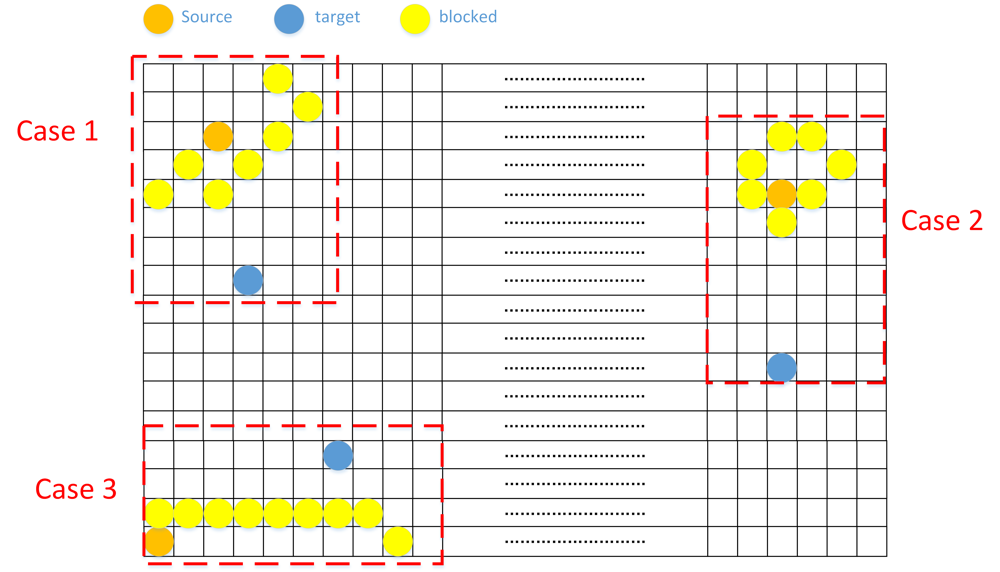

There are two cases that source node cannot reach target node
* case 1 is the blocked points and boundary points form a closed interval and one node(source or target) in,another out.
* case 2 is only the blocked points form a closed interval and one node(source or target) in,another out.

the key point is the length of blocked is smaller than 200, so the closed area will not too large
we can just use bfs to search from the source, and set a maximum step.
after moving maximum step, if we can still move, then it must can reach the target point

here the maximum step should be the length of blocked, seen in case 3
of course, we should handled the different situation with the starting node



In [1]:
def isEscapePossible(blocked, source, target):
    """
    :type blocked: List[List[int]]
    :type source: List[int]
    :type target: List[int]
    :rtype: bool
    """
    blocked = set(map(tuple,blocked))

    def dfs ( x,y, target,seen):
        if not (0 <= x < 10**6 and 0 <= y < 10**6) or (x,y) in blocked or (x,y) in seen:
            return False
        seen.add((x,y))
        # if reach 20000 steps, return True
        if len(seen) > 20000 or [x,y] == target:
            return True
        return dfs(x+1,y,target,seen) or \
                dfs(x-1,y,target,seen) or \
                dfs(x,y+1,target,seen) or \
                dfs(x,y-1,target,seen) 

    return dfs(source[0],source[1],target,set()) and dfs(target[0],target[1],source,set())

isEscapePossible([[0,1],[1,0]],[0,0],[0,2])

False

In [ ]:
def isEscapePossible(blocked: List[List[int]], source: List[int], target: List[int]) -> bool:
    blocked = {tuple(p) for p in blocked}

    def bfs(source,target):
        queue,seen = [source],{tuple(source)}
        direction = [[0,1],[1,0],[-1,0],[0,-1]]
        for x0,y0 in queue:
            for i,j in direction:
                x,y = x0 + i, y0 + j
                if (0 <= x < 10**6) and (0 <= y < 10**6) and (x,y) not in seen and (x,y) not in blocked:
                    if [x,y] == target:
                        return True
                    queue.append([x,y])
                    seen.add((x,y))
            if len(queue) == 20000:
                return True
        return False

    return bfs(source,target) and bfs(target,source)

## daily coding challenge 23
Google
You are given an M by N matrix consisting of booleans that represents a board.
Each True boolean represents a wall. Each False boolean represents a tile you can walk on.
Given this matrix, a start coordinate, and an end coordinate, return the minimum number of steps
required to reach the end coordinate from the start.
If there is no possible path, then return null. You can move up, left, down, and right.
You cannot move through walls. You cannot wrap around the edges of the board.
For example, given the following board:
    [[f, f, f, f],
    [t, t, f, t],
    [f, f, f, f],
    [f, f, f, f]]
and start = (3, 0) (bottom left) and end = (0, 0) (top left), the minimum number of steps required to reach the end is 7,
since we would need to go through (1, 2) because there is a wall everywhere else on the second row.

In [12]:
shortestDistance = float('inf')
def findshortestDistance(maze,source,target,seen,currentDistance):
    global shortestDistance
    (x,y) = source
    if (x not in range(0,len(maze))) or (y not in range(0,len(maze))) or \
        (maze[x][y]==True) or (x,y) in seen:
        return
    if source == target:
        shortestDistance = min(shortestDistance,currentDistance)
        return shortestDistance
    findshortestDistance(maze,(x-1,y),target,seen+[source],currentDistance+1)
    findshortestDistance(maze,(x,y-1),target,seen+[source],currentDistance+1)
    findshortestDistance(maze,(x,y+1),target,seen+[source],currentDistance+1)
    findshortestDistance(maze,(x+1,y),target,seen+[source],currentDistance+1)

    
maze =  [[False, False, False, False],
            [True, True, False, True],
            [False, False, False, False],
            [False, False, False, False]]
start = (3, 0)
end   = (0, 0)
findshortestDistance(maze, start, end, [], 0)
shortestDistance

7